In [22]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ridge = Ridge(alpha=0.0001)

In [2]:
from sklearn.datasets import load_diabetes

In [5]:
data = load_diabetes()

In [7]:
X = data.data
y = data.target

In [8]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5271561853905228

In [23]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [24]:
r2_score(y_test,ridge.predict(X_test))

0.527172889514558

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

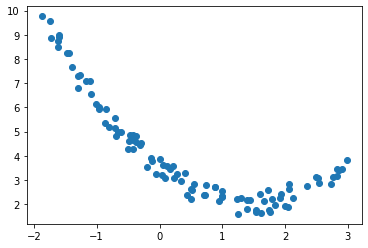

In [30]:
m = 100
x1 = 5*np.random.rand(m,1)-2
x2 = 0.7*x1**2 - 2*x1 + 3+ np.random.rand(m,1)

plt.scatter(x1,x2)

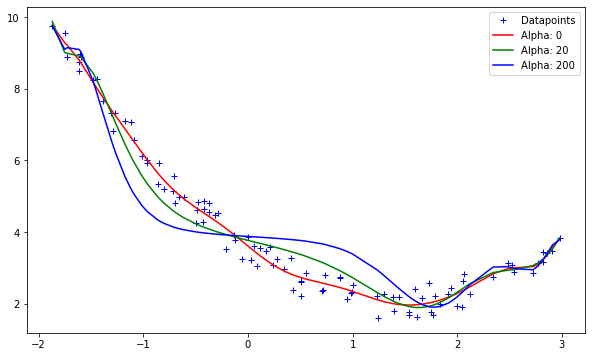

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model = Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)
alphas = [0,20,200]
cs = ['r','g','b']
plt.figure(figsize = (10,6))
plt.plot(x1,x2,'b+',label = 'Datapoints')

for alpha,c in zip(alphas,cs):
    preds = get_preds_ridge(x1,x2,alpha)
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha: {}'.format(alpha))
    
plt.legend()
plt.show()